In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('../data/heart_disease.csv')
columns = list(df.columns)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [19]:
df.dropna(inplace=True)
df['num'] = [1 if idx > 0 else 0 for idx in df['num']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [20]:
from sklearn.preprocessing import MinMaxScaler

columns_scale = list(df.columns)

scalar = MinMaxScaler()
model = scalar.fit(df)
scaled_data = model.transform(df)

df = pd.DataFrame(scaled_data, columns=columns_scale)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1.0
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0.0


<AxesSubplot: xlabel='oldpeak', ylabel='num'>

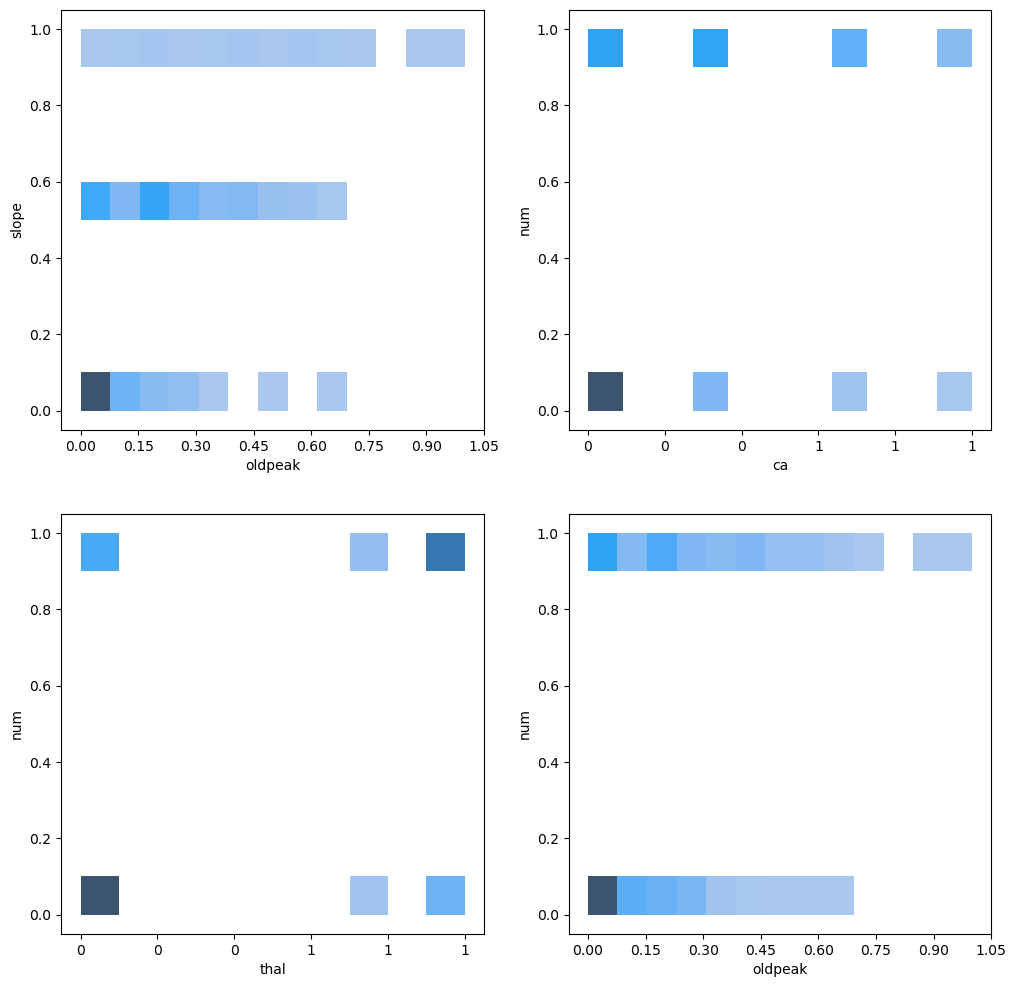

In [21]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 12)
axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[0,0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[0,1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[1,0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[1,1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
sns.histplot(x='oldpeak',y='slope',data=df, ax=axes[0,0])
sns.histplot(x='ca',y='num',data=df, ax=axes[0,1])
sns.histplot(x='thal',y='num',data=df, ax=axes[1,0])
sns.histplot(x='oldpeak',y='num',data=df, ax=axes[1,1])

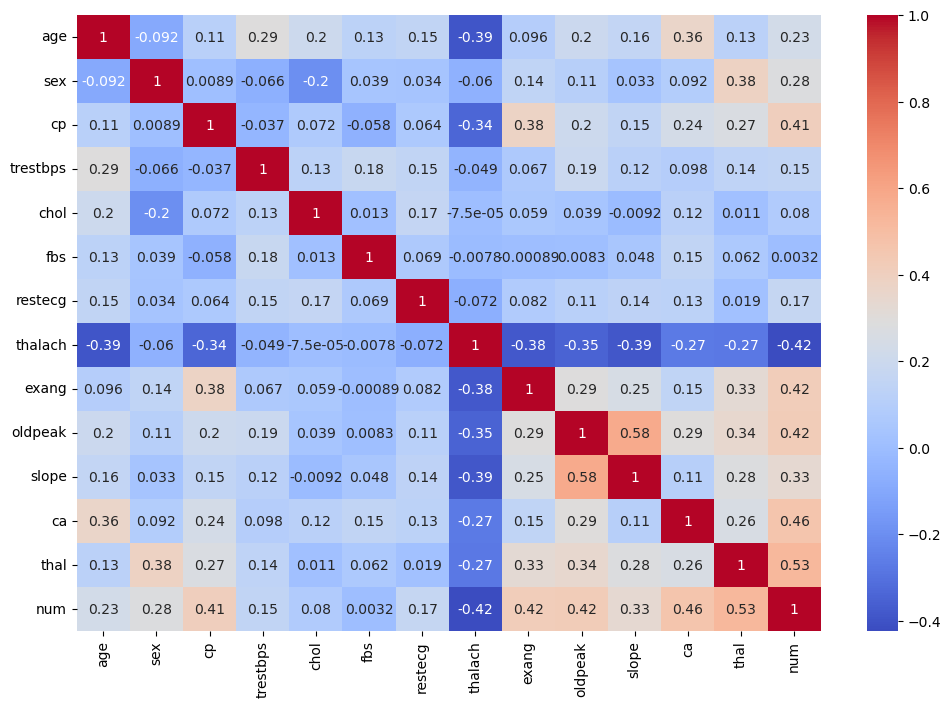

In [22]:
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)
plt.gcf().set_size_inches(12, 8)
plt.show()

<AxesSubplot: xlabel='oldpeak', ylabel='num'>

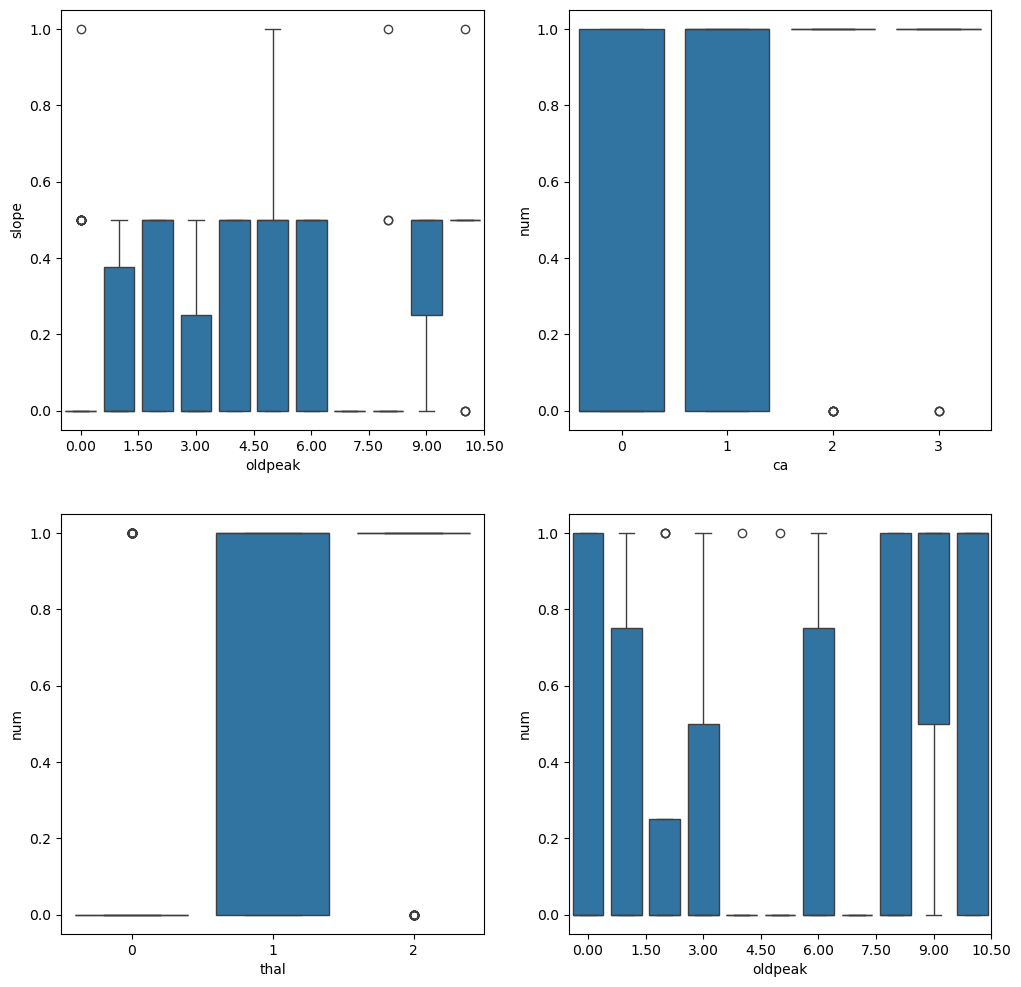

In [23]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 12)
axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[0,0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[0,1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[1,0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[1,1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
sns.boxplot(x='oldpeak',y='slope',data=df, ax=axes[0,0])
sns.boxplot(x='ca',y='num',data=df, ax=axes[0,1])
sns.boxplot(x='thal',y='num',data=df, ax=axes[1,0])
sns.boxplot(x='oldpeak',y='num',data=df, ax=axes[1,1])

In [24]:
df.to_csv('../data/heart_disease1.csv')